In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd .read_excel("D:/MLDatasets/superstore_USA.xlsx")

In [4]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


In [5]:
dataset.shape

(9426, 24)

In [6]:
# Now start doing  data analysis by finding missing values
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
#  here in Product Base Margin there are 72 missing values ,lets check
# next step to fill the missing values
# we can fill the missing values by taking the "mean" of the values
# here we are filling the data by "fillna" in dataset variable  then product base margin by taking mean,inplace true means we repalcing with the original dataset.
dataset['Product Base Margin'].fillna(dataset["Product Base Margin"].mean(), inplace = True)

C:\Users\SAI RAM\AppData\Local\Temp\ipykernel_95472\1962264933.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Product Base Margin'].fillna(dataset["Product Base Margin"].mean(), inplace = True)


In [8]:
# now if we see there is no missing value,"Product base margin is filled"
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [9]:
# next step in dataset row id is not much important for analaysis but "Order Priority " is important 
# to know how many customers are there for high priority and low priority,medium and not specified.
# suppose for example if iwant to buy mouse in bulk that is more in number thenit is urgent priority ,high order priority.


In [10]:
dataset.shape

(9426, 24)

# 1) ORDER PRIORITY
## UNIVARIATE ANALYSIS(means data analysis  is done on "single" variable or attribute,so here it is "Order Priority")

In [11]:
# to know the priority we going do graphically analysis and non-graphically analysis
# from 9426 we will get to know how much is high,low,medium priority  product order
dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [12]:
# Here nowwe got the order priority
# just observe in both the critical values there is lot of difference , lets find out why there is more difference.(1804) and (1)
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [13]:
# now there is basic problem ,it can be solved by data cleaning....
# in critical it is with "space"observe..so now we are calling replace for solving it...
# here we are replacing"critical" with"critical "....this it with space...
dataset["Order Priority"].replace("Critical ","Critical")

0       Not Specified
1                High
2       Not Specified
3       Not Specified
4       Not Specified
            ...      
9421         Critical
9422         Critical
9423    Not Specified
9424             High
9425    Not Specified
Name: Order Priority, Length: 9426, dtype: object

In [14]:
# Now again we have go to dataset['order priority' and set it...
dataset['Order Priority']=dataset["Order Priority"].replace("Critical ","Critical")

In [15]:
#now agaian check the value_counts
dataset['Order Priority'].value_counts()
# this is "numerical data"

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [16]:
# Now check the critical values are changed

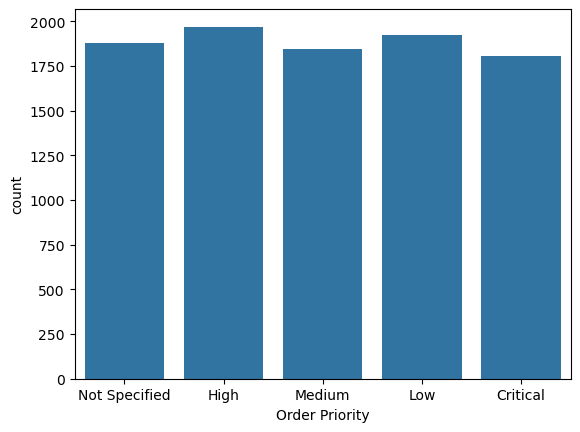

In [17]:
# now next step is graphical analysis,here x= order priority and we are getting "data" from the "dataset".
sns.countplot(x="Order Priority",data=dataset)
plt.show()


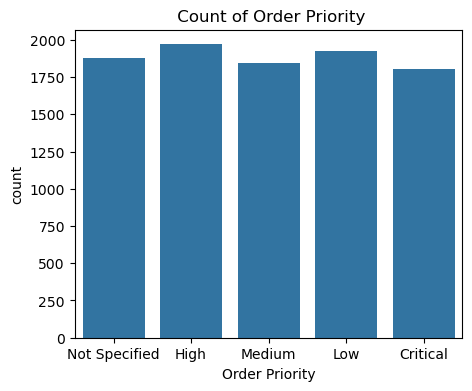

In [18]:
# now we got graph of all priority orders
#now here graph is big ,let make it small bt "figure" we will reduce it size(4,3)
# this is "graphical data"
# saving this graphical in "jpg" format
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title(" Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")
plt.show()


## SHIPPING MODE

In [19]:
# Next we can do analysis on shipping mode,through shipping mode we will get know through which shipping mode more orders are shipped...
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [20]:
# so from above output we got to know that through  Regular air=7036,delivery truck=1283,Express Air=1107 orders are shipped...
# now lets make pie chart for this
dataset['Ship Mode'].value_counts().index

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [21]:
# let us assign it to "x"
x=dataset['Ship Mode'].value_counts().index
y=dataset['Ship Mode'].value_counts().values

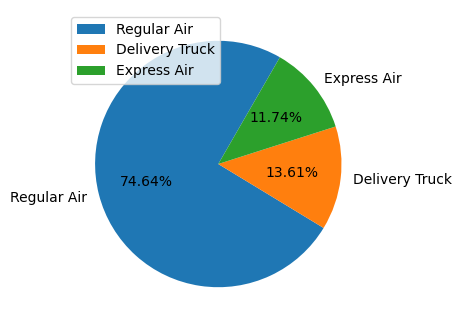

In [22]:
# here we are plotting the values (y)by pie chart,and labelling it (labels=x),where x= index(regular air,delivery truck,express air)
# here strangle=60means we are rotating the oie chart to 60 degrees.
# here "autopct "means we are able to get all the shipping modes in percentage and "%0.2f%% is a formula toget in %.. 

plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.show()

## BIVARIATE ANALYSIS
## Based on two variables or columns,so here it is"Product Category" and "Shipping Mode"

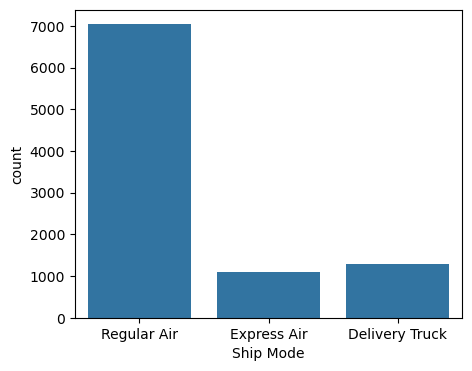

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset)
plt.show()


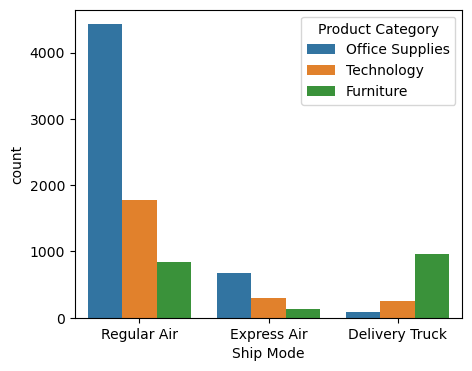

In [24]:
## Now we need to find out which product category is going through "regular air","express air",Delivery Truck"..
## now to find it we going to use "hue" to get more clear difference of "product category"in different "ship mode"..
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()


In [25]:
# so here found out that which product category is supplied  and how much is supplied through different "ship mode"

## next step is know the "Customer Segment" means where customer is corporate,or normal customer..

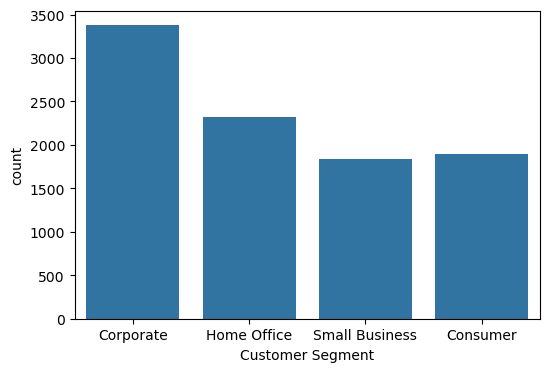

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

### Product Category


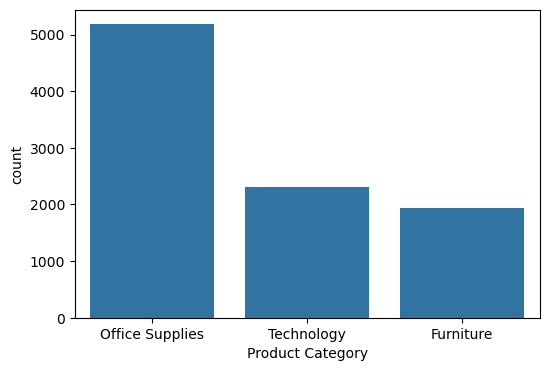

In [27]:
## here E-Commerence we will get to know which product is getting saled more in which category..
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

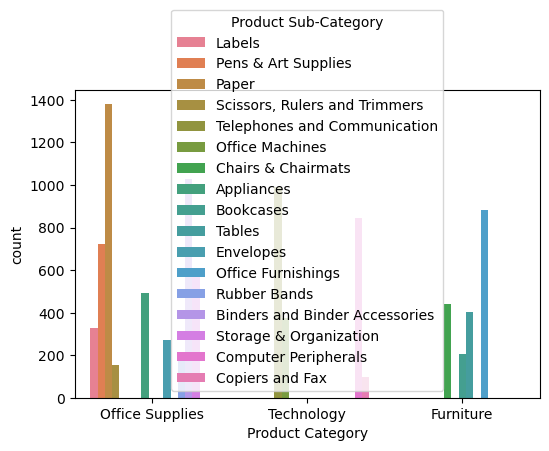

In [28]:
## so here "office supplies " is getting more saled then "Technology", and last "Furniture"
## now let us find product sub-category
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset,hue="Product Sub-Category")
plt.show()


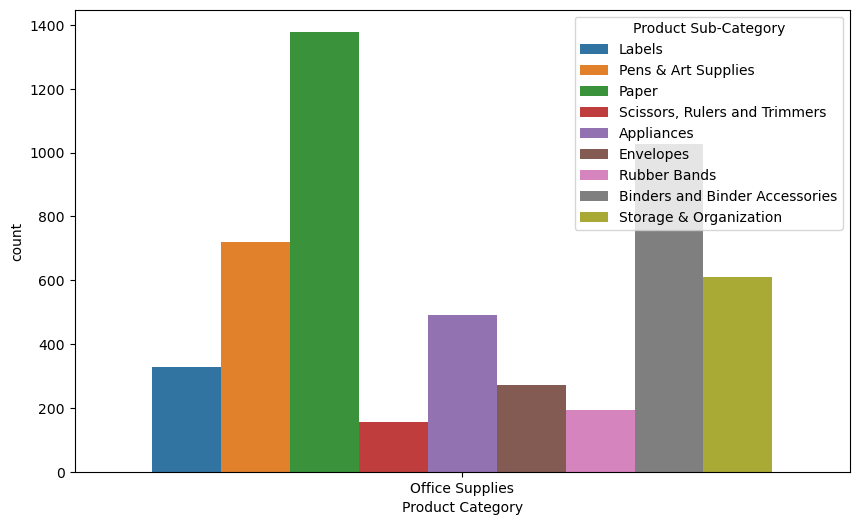

In [30]:
## now let us make separete graph for "office supplies","Technology","Furniture"
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

In [ ]:
# so now i got grapgh for ony "office supplies"..


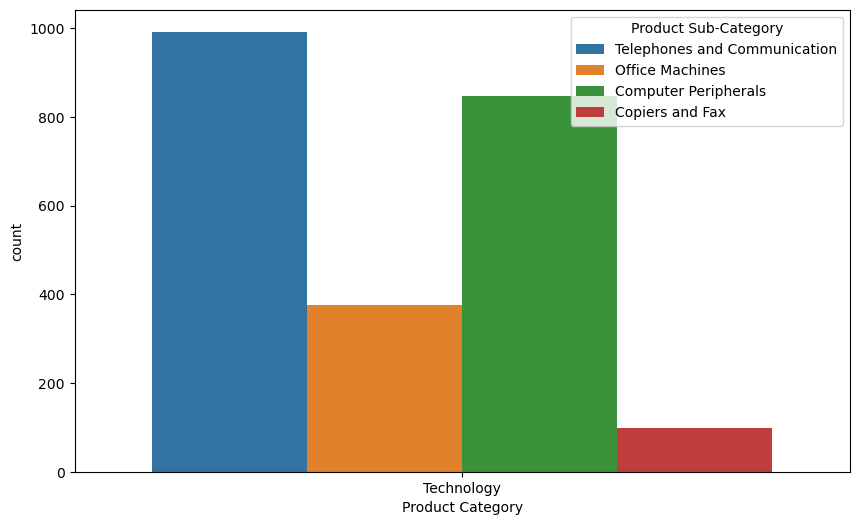

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.show()

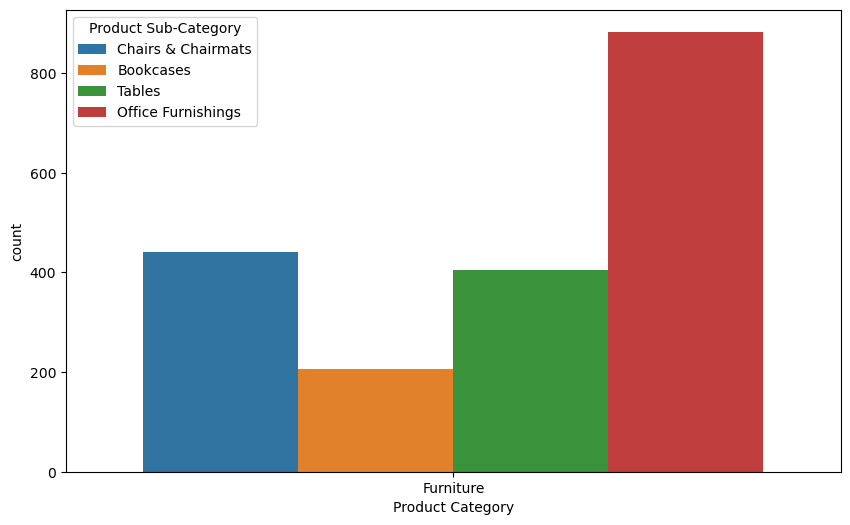

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.show()

In [33]:
##Next step we will take "Order Date" to find out for which date the orders are more..
## for that first we need to seperate "years" fromthe "order Date"
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [34]:
## look at the output  "order date" and"ship Date" are in "datetime" already...
dataset['Order Date'].dt.year

0       2012
1       2010
2       2011
3       2011
4       2011
        ... 
9421    2013
9422    2013
9423    2013
9424    2010
9425    2013
Name: Order Date, Length: 9426, dtype: int32

In [37]:
# now i am saving it in new column naming it as dataset["Order Year"]
dataset["Order Year"] = dataset['Order Date'].dt.year

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [39]:
# see "order year" is in "int"..
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

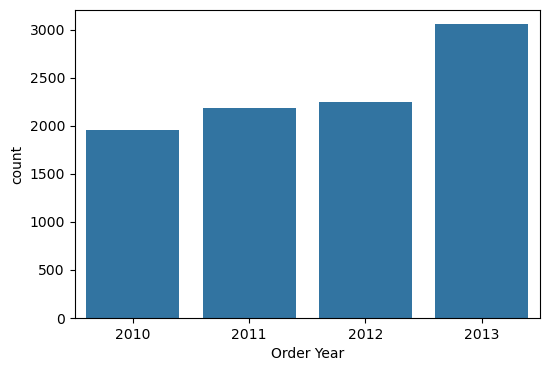

In [40]:
# means at "2013", "3054" order are palced..likewise remaning orders are placed..
# year by year order values are getting increased  from  2010 to 2013.
plt.figure(figsize=(6,4))
sns.countplot(x="Order Year",data=dataset)
plt.show()

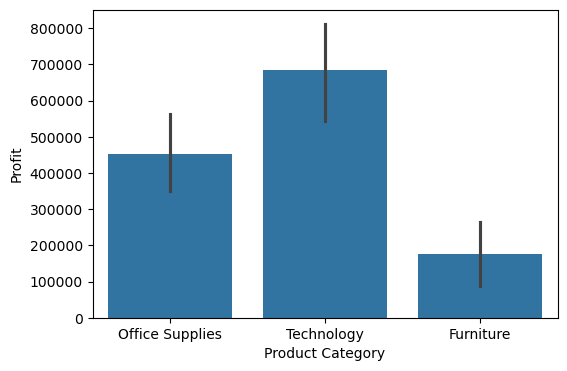

In [42]:
# next step look at the dataset "Profit"
# to find out in which "category" how much is "profitable"..
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum')
plt.show()

In [47]:
# next is "state or provience" in dataset
# next i want to know in which "state" ,how much "sales" are there..
dataset['State or Province'].value_counts()

State or Province
California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico               

In [48]:
# so from state "California" maximun "sales" are done.and instate "Delaware" least sales is done..
# now let us find "top five" 
dataset['State or Province'].value_counts()[:5]


State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [49]:
# so we got "top five"..


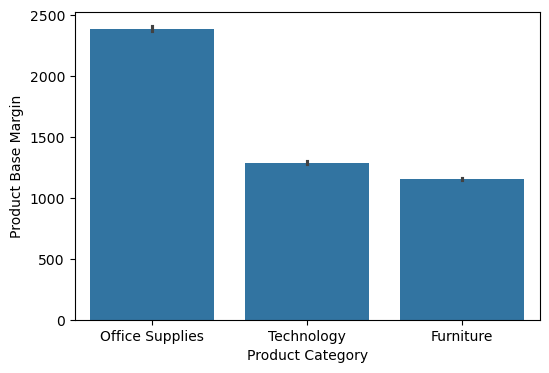

In [51]:
# To find out "Product Based Margin "...## see dataset..
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator='sum')
plt.show()

In [52]:
# so in "office supplies" there is more "Margin"and in "Furniture"it is less.

In [53]:
##--------------------------SUMMARY OF THE  Analysis on the Data Set "E-Commerce project"-----------------
##1) The margin we are getting more in "office supplies",we need to work on "Furniture"
## 2)  In state "california" the business is  good.
##3) High profitable business is in "Technology"
## 4) year by year company orderis increasing..2011,3012,2013..
## 5)In "office supplies"supply is more but margin is less, where as in "Technology"  supply is "less" but margin is "more"...
## 6)   In "Corporate" customer segment supplies are "more"..
## 7) "ship mode"===through "Regular Air"maximum shipping is done..
## 8) Order Priority is also done..